In [3]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0] if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [6]:
def get_percentage_miss_value(dataset):
    higher_miss_value_column = []
    miss_threshold_value = 50
    
    for i in dataset.columns:
        if dataset[i].isna().sum() > 1: 
            perectange_val = (dataset[i].isna().sum() / len(dataset)) * 100
            print("Column-> " , i, ", total no of missing value : ",dataset[i].isna().sum() , " & :         ", round(perectange_val,2) ," %")
                
            if(perectange_val > miss_threshold_value):
                higher_miss_value_column.append(i)
            
    print("\n\n\n")
        
    if higher_miss_value_column:
        print("Higher Missing values in Columns for Delete : \n\n", higher_miss_value_column) 
        
        return higher_miss_value_column
    else:
        print("There are no Higher Column Missing values in Dataset")
        
missing_val = get_percentage_miss_value(df)

Column->  Gender , total no of missing value :  13  & :          2.12  %
Column->  Married , total no of missing value :  3  & :          0.49  %
Column->  Dependents , total no of missing value :  15  & :          2.44  %
Column->  Self_Employed , total no of missing value :  32  & :          5.21  %
Column->  LoanAmount , total no of missing value :  22  & :          3.58  %
Column->  Loan_Amount_Term , total no of missing value :  14  & :          2.28  %
Column->  Credit_History , total no of missing value :  50  & :          8.14  %




There are no Higher Column Missing values in Dataset


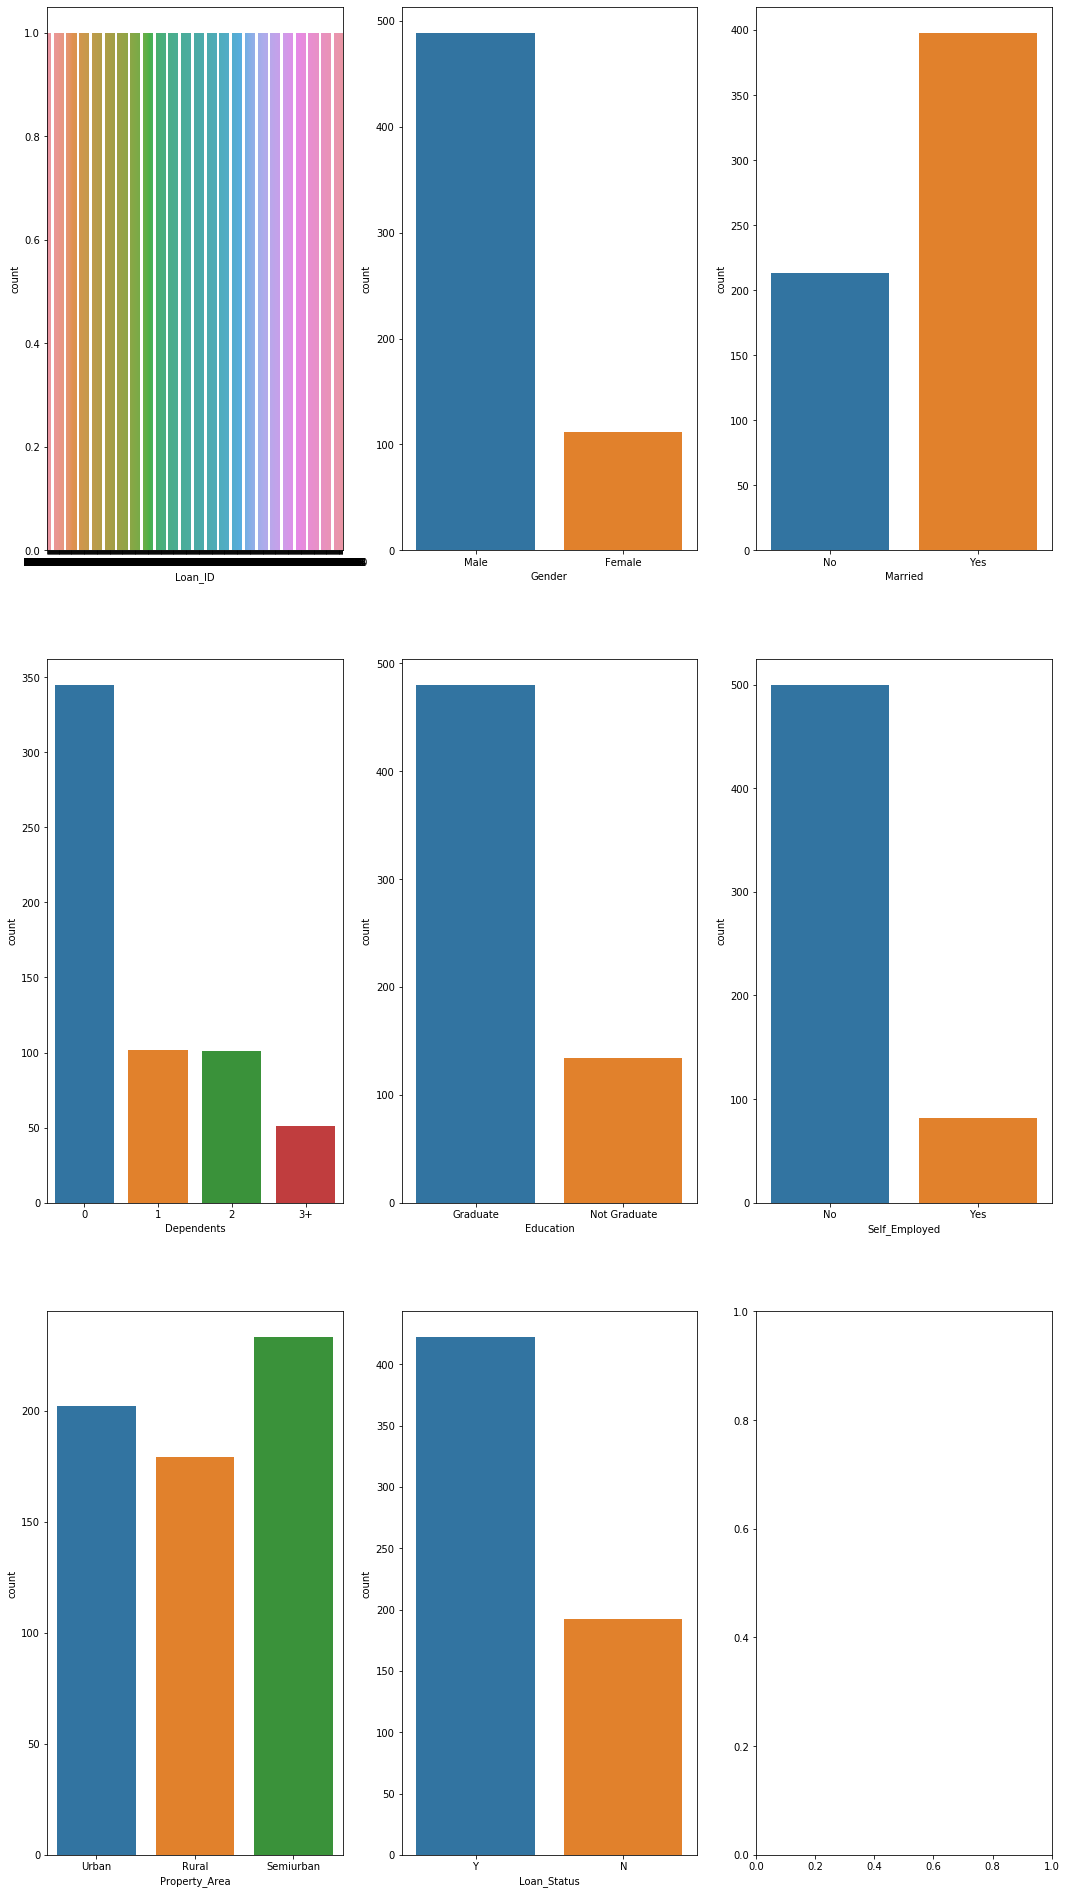

In [7]:
def visualize_categorical_values(dataset):
    no_of_columns = 3
    no_of_rows = 3
    
    columns_object_type = [i for i in dataset.columns  if dataset[i].dtype == "object"]
    total_rows = (len(columns_object_type) // no_of_rows ) + 1
    
    f, axes = plt.subplots(total_rows, no_of_columns, figsize=(18,34))

    for ind, val in enumerate(columns_object_type):
        sns.countplot(df[val] , ax = axes[ind // no_of_rows , ind %no_of_columns ])
    plt.show() 
    
visualize_categorical_values(df)

<Figure size 1296x2448 with 0 Axes>

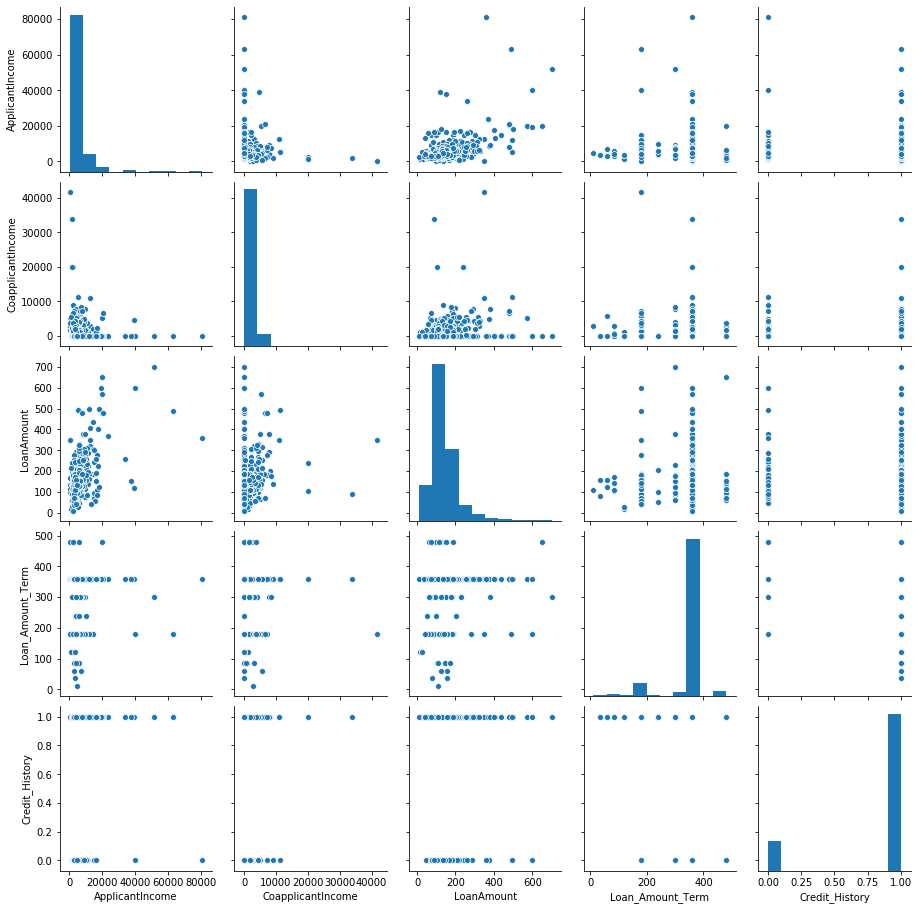

In [8]:
def visualize_numberical_values(dataset):
    plt.figure(figsize=(18,34))
    sns.pairplot(df)
    plt.show()
visualize_numberical_values(df)

In [9]:
def check_cloumn_details_type_categorical(dataset):
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            
            print("*"*100)
            print("\n")
check_cloumn_details_type_categorical(df)

Columns name :   Loan_ID
{'LP001002': 1, 'LP001003': 1, 'LP001005': 1, 'LP001006': 1, 'LP001008': 1, 'LP001011': 1, 'LP001013': 1, 'LP001014': 1, 'LP001018': 1, 'LP001020': 1, 'LP001024': 1, 'LP001027': 1, 'LP001028': 1, 'LP001029': 1, 'LP001030': 1, 'LP001032': 1, 'LP001034': 1, 'LP001036': 1, 'LP001038': 1, 'LP001041': 1, 'LP001043': 1, 'LP001046': 1, 'LP001047': 1, 'LP001050': 1, 'LP001052': 1, 'LP001066': 1, 'LP001068': 1, 'LP001073': 1, 'LP001086': 1, 'LP001087': 1, 'LP001091': 1, 'LP001095': 1, 'LP001097': 1, 'LP001098': 1, 'LP001100': 1, 'LP001106': 1, 'LP001109': 1, 'LP001112': 1, 'LP001114': 1, 'LP001116': 1, 'LP001119': 1, 'LP001120': 1, 'LP001123': 1, 'LP001131': 1, 'LP001136': 1, 'LP001137': 1, 'LP001138': 1, 'LP001144': 1, 'LP001146': 1, 'LP001151': 1, 'LP001155': 1, 'LP001157': 1, 'LP001164': 1, 'LP001179': 1, 'LP001186': 1, 'LP001194': 1, 'LP001195': 1, 'LP001197': 1, 'LP001198': 1, 'LP001199': 1, 'LP001205': 1, 'LP001206': 1, 'LP001207': 1, 'LP001213': 1, 'LP001222': 1,

In [10]:
def check_cloumn_details_type_numberical(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "int"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")
            
            
def check_cloumn_details_type_float(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "float"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")
check_cloumn_details_type_numberical(df) 
check_cloumn_details_type_float(df)

Columns name :   ApplicantIncome
{5849: 1, 4583: 6, 3000: 3, 2583: 4, 6000: 6, 5417: 3, 2333: 3, 3036: 1, 4006: 1, 12841: 1, 3200: 2, 2500: 9, 3073: 1, 1853: 1, 1299: 1, 4950: 1, 3596: 1, 3510: 2, 4887: 1, 2600: 6, 7660: 1, 5955: 1, 3365: 1, 3717: 2, 9560: 1, 2799: 1, 4226: 1, 1442: 1, 3750: 5, 4166: 5, 3167: 3, 4692: 1, 3500: 3, 12500: 1, 2275: 1, 1828: 1, 3667: 2, 3748: 1, 3600: 1, 1800: 2, 2400: 4, 3941: 1, 4695: 1, 3410: 1, 5649: 1, 5821: 1, 2645: 1, 4000: 3, 1928: 1, 3086: 1, 4230: 1, 4616: 1, 11500: 1, 2708: 1, 2132: 1, 3366: 1, 8080: 1, 3357: 1, 3029: 1, 2609: 1, 4945: 1, 5726: 1, 10750: 1, 7100: 1, 4300: 2, 3208: 1, 1875: 1, 4755: 1, 5266: 1, 1000: 1, 3333: 5, 3846: 1, 2395: 1, 1378: 1, 3988: 1, 2366: 1, 8566: 1, 5695: 1, 2958: 1, 6250: 4, 3273: 1, 4133: 1, 3620: 1, 6782: 1, 2484: 1, 1977: 1, 4188: 1, 1759: 1, 4288: 1, 4843: 1, 13650: 1, 4652: 2, 3816: 1, 3052: 1, 11417: 1, 7333: 2, 3800: 1, 2071: 1, 5316: 1, 2929: 1, 3572: 1, 7451: 1, 5050: 1, 14583: 2, 2214: 1, 5568: 1, 10408

In [11]:
def check_skewness_numerical(dataset,target):
    #analysing the distribution of HR Selection
    print('skew is', dataset[target].skew())   
    plt.hist(dataset['target'], color= 'b')

    plt.title('Distribution of HR section YES / NO', fontsize = 24)
    plt.ylabel('observation', fontsize = 20)
    plt.xlabel('selection', fontsize = 20)

    plt.show()
    
check_skewness_numerical(df , "target")

KeyError: 'target'

In [12]:
def drop_outliers(dataset, columns_name):
    for chk in columns_name:
        
#         plt.boxplot(dataset[chk]) # please with graph & it is optional
        
        Q1 = dataset[chk].quantile(.25)
        Q3 = dataset[chk].quantile(.75)
        IQR = Q3-Q1
        dataset =  dataset[(dataset[chk] >= (Q1-(1.5*IQR))) & (dataset[chk] <= (Q3+(1.5*IQR)))] 
    return dataset

In [14]:
def corr_metrix(dataset):
    corr = dataset.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap='RdYlGn')

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
    ax.tick_params(labelsize=20)



def corr_2_more_visualize(dataset):
    corr = dataset.corr()
    
    f, ax = plt.subplots(figsize=(20, 9))
    sns.heatmap(corr.apply(lambda x : np.round(x,2)), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,cmap='RdYlGn', annot_kws={"size": 15})
    ax.tick_params(labelsize=20)
    plt.show()

In [15]:
def reg_evaluation(y_actual, y_pred, data_type = "Train"):
    print("Model Evaluation Dataset Type is  : ", data_type)
    print("\n")
    
    print("Accuracy  :  ", r2_score(y_actual, y_pred))
    print("MAE       :  ", mean_absolute_error(y_actual, y_pred))
    print("MSLE      :  ", mean_squared_log_error(y_actual, y_pred))
    print("MSE       :  ", mean_squared_error(y_actual, y_pred))
    print("RMSE      :  ", np.sqrt(mean_squared_error(y_actual, y_pred)))
    
def linear_regression_train_test():
    #Linear regression with L2 regularization
    for i in range(-2, 3):
        alpha = 10**i
        rm = Ridge(alpha = alpha)
        ridge_model = rm.fit(X_train, y_train)
        preds_ridge = ridge_model.predict(X_test)
    
        plt.scatter(preds_ridge, y_test, alpha= 0.75, c= 'b')
        plt.xlabel('Predicted price')
        plt.ylabel('Actual price')
        plt.title('Ridge redularization with alpha {}'.format(alpha))
        overlay = 'R square: {} \nRMSE: {}'.format(ridge_model.score(X_test, y_test), mean_squared_error(y_test, preds_ridge))
        plt.annotate(s = overlay, xy = (12.1, 10.6), size = 'x-large')
        plt.show()
        
def actual_predict_visualization(actual_values, predict_values):
    plt.scatter(actual_values, predict_values, alpha= 0.75, color = 'b')

    plt.xlabel('Predicted price')
    plt.ylabel('Actual price')
    plt.title('Regression Model')
    plt.show()

In [ ]:
rows=[]
def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25 , random_state = i)
            model.fit(x_train,y_train)
            pred_test = model.predict(x_test)
            row = [names[j],i,r2_score (y_test,pred_test)]
            rows.append(row)
    models_df = pd.DataFrame(rows)   
    models_df.columns = columns_name
    print(models_df)
    

    
    
def mean_absolute_percentage_error(y_true, y_pred) :
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    return np.mean(np.abs( (y_true - y_pred) / 100) ) * 100


def root_mean_sequare_error(y_true, y_pred) : 
    mse = mean_squared_error(y_true,  y_pred)  
    return np.sqrt(mse)
   

rows=[]

def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.30 , random_state = i)
            
            model.fit(x_train,y_train)
            
            y_pred_train = model.predict(x_train)
            y_pred = model.predict(x_test)
            
            train_acc = r2_score(y_train, y_pred_train)
            train_acc = round(train_acc, 2) * 100
            
            test_acc = r2_score(y_test, y_pred)
            test_acc = round(test_acc, 2) * 100
            
            mape = mean_absolute_percentage_error(y_test, y_pred)
            mape = round(mape, 2)
            
            mae = mean_absolute_error(y_test, y_pred)   
            mae = round(mae, 2)
            
            mse = mean_squared_error(y_test, y_pred)
            mse = round(mse, 2)
            
            rmse = root_mean_sequare_error(y_test, y_pred)
            rmse = round(rmse, 2)

            row = [names[j],   i,   train_acc, test_acc,  mae,    mse]
    
            rows.append(row)
            
    models_df = pd.DataFrame(rows) 
    
    models_df.columns = columns_name
    print(models_df)
    
names_regression = [ "Lasso", "Ridge"]
algorithms = [ Lasso(), Ridge(alpha=ridge_alpha)]

columns_name = ["Model",    "Random_state",   'Train_acc',     "Test_acc",   "MAE",   "MSE"]

random_state_list_up_to_10 = [0,1,2,3,4,5,6,7,8,9,10]


addRandomStateForAlgorithm(X,y,names_regression,algorithms,columns_name,random_state_list_up_to_10)

In [16]:

from sklearn.base import TransformerMixin, BaseEstimator

from collections import Counter , defaultdict

import pandas as pd
from pandas import Series as s , DataFrame as df
import numpy as np

import seaborn as sns
# import matplotlib.pyplot as plt

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt, rcParams as rc


%matplotlib inline
rc["figure.figsize"] = 10,6

import datetime
import datetime as dt

In [1]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, normalize


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


from xgboost import XGBRegressor , XGBRFRegressor

import lightgbm


from catboost import CatBoostRegressor

from sklearn.pipeline import Pipeline

# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
from collections import Counter , defaultdict

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.base import TransformerMixin, BaseEstimator

from imblearn.over_sampling import SMOTE

from imblearn.combine import SMOTETomek # over sampling method 1



## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler # over sampling method 2



from imblearn.under_sampling import NearMiss


#preprocessing
from sklearn.preprocessing import LabelEncoder



import lightgbm as lgb

# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [5]:
df = pd.read_csv("train_ctrUa4K.csv")

df_test = pd.read_csv("test_lAUu6dG.csv")
submission = pd.read_csv("sample_submission_49d68Cx.csv")

df10 = df.copy()
df.shape, df_test.shape, submission.shape


((614, 13), (367, 12), (367, 2))

In [ ]:
submission_1 = submission.copy()

print(df_test.shape , submission.shape , len(y_pred_final))

submission_1["target"] = y_pred_final

print(submission_1["target"].values)

submission_1.to_csv('submission_7.csv', index=False)

df_submission_1 = pd.read_csv('submission_7.csv')
print(df_submission_1.shape)

df_submission_1.head(3)